In [1]:
# Import packages
#yfinance - open-source API pip 
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from flask import Flask, render_template
import pymongo
from pprint import pprint

In [2]:
# Set start/end date
start_date = '2016-01-01'
end_date = '2022-01-15'

# Define ticker list
#NTDOY= Nintendo
#SONY= SONY
#MSFT= Microsoft
#ATVI= Activision Blizzard
#ZNGA= Zynga
#EA= Electronic Arts
tickers_list = ['NTDOY', 'SONY', 'MSFT', 'ATVI', 'EA']

# Create placeholder for data
data = pd.DataFrame(columns=tickers_list)

# Fetch data
for ticker in tickers_list:
    data[ticker] = yf.download(ticker, 
                               start_date,
                               end_date)['Adj Close']
    
# Print first 5 rows of the data
data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,NTDOY,SONY,MSFT,ATVI,EA
Date,,,,,
2016-01-04,17.250000,24.730000,49.591049,36.190575,65.685226
2016-01-05,16.559999,25.469999,49.817287,35.728809,64.532501
2016-01-06,15.740000,23.629999,48.912342,35.392113,63.280403
2016-01-07,15.980000,23.270000,47.211040,34.891869,62.068054
2016-01-08,16.049999,23.000000,47.355835,34.353142,62.733856


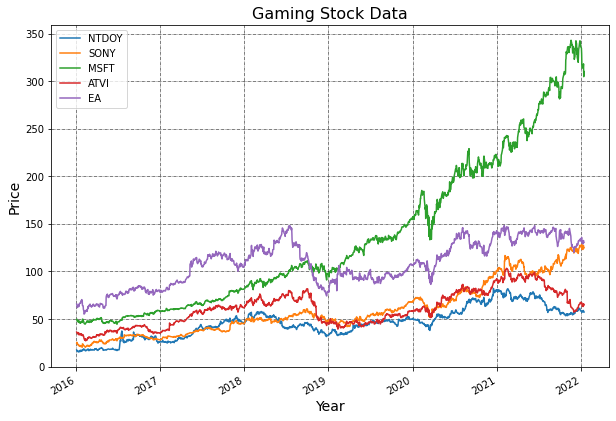

In [3]:
# Plot close prices
data.plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Gaming Stock Data", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [7]:
data

,NTDOY,SONY,MSFT,ATVI,EA
Date,,,,,
2016-01-04,17.250000,24.730000,49.591049,36.190575,65.685226
2016-01-05,16.559999,25.469999,49.817287,35.728809,64.532501
2016-01-06,15.740000,23.629999,48.912342,35.392113,63.280403
2016-01-07,15.980000,23.270000,47.211040,34.891869,62.068054
2016-01-08,16.049999,23.000000,47.355835,34.353142,62.733856
...,...,...,...,...,...
2022-01-10,58.439999,123.169998,314.269989,63.110001,128.899994
2022-01-11,58.990002,126.320000,314.980011,65.849998,130.800003
2022-01-12,58.549999,127.150002,318.269989,64.809998,132.500000


In [5]:
gamingstockdata = data.to_dict('records') 

In [8]:
pprint(gamingstockdata[0])

{'ATVI': 36.190574645996094,
 'EA': 65.68522644042969,
 'MSFT': 49.59104919433594,
 'NTDOY': 17.25,
 'SONY': 24.729999542236328}


In [10]:
# connect to mongo
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# db declaration
db = client.stockdata_db
collection = db.topgamestocks

In [11]:
# add to mongo
collection.insert_many(gamingstockdata)